<a href="https://colab.research.google.com/github/sreeragnv/DSLAB/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
#from matplotlib import pyplot
#import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
class KMeansClustering:
    def __init__(self, X, num_clusters):
        self.K = num_clusters # cluster number
        self.max_iterations = 100 # max iteration. don't want to run inf time
        self.num_examples, self.num_features = X.shape # num of examples, num of features
        self.plot_figure = True # plot figure

    # randomly initialize centroids
    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero
        for k in range(self.K): # iterations of
            centroid = X[np.random.choice(range(self.num_examples))] # random centroids
            centroids[k] = centroid
        return centroids # return random centroids

    # create cluster Function
    def create_cluster(self, X, centroids):
        clusters = [[] for _ in range(self.K)]
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point-centroids)**2, axis=1))
            ) # closest centroid using Euclidean distance equation(calculate distance of every point from centroid)
            clusters[closest_centroid].append(point_idx)
        return clusters

    # new centroids
    def calculate_new_centroids(self, cluster, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero
        for idx, cluster in enumerate(cluster):
            new_centroid = np.mean(X[cluster], axis=0) # find the value for new centroids
            centroids[idx] = new_centroid
        return centroids

    # Find cluster
    def find_cluster(self, clusters, X):
        y_find = np.zeros(self.num_examples) # row1 fillup with zero
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_find[sample_idx] = cluster_idx
        return y_find

    # plotinng scatter plot
    def plot_fig(self, X, y):
        fig = px.scatter(X[:, 0], X[:, 1], X[:,2], color=y)
        #color=y.astype(int)
        #plt.scatter(X[:, 0].astype(int), X[:, 1].astype(int), 'o', color);
        #plt.scatter(X[:, 0], X[:, 1],X[:,2],color=y)
        fig.show() # visualize

    # fit data
    def fit(self, X):
        centroids = self.initialize_random_centroids(X) # initialize random centroids
        for _ in range(self.max_iterations):
            clusters = self.create_cluster(X, centroids) # create cluster
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X) # calculate new centroids
            diff = centroids - previous_centroids # calculate difference
            if not diff.any():
                break
        y_find = self.find_cluster(clusters, X) # find the cluster of X
        if self.plot_figure: # if true
            self.plot_fig(X, y_find) # plot function
        return y_find


In [ ]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
iris.head(2)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [ ]:
iris_feature_data=iris.loc[:,0:2]
iris_feature_data.head(2)

,0,1,2
0,5.1,3.5,1.4
1,4.9,3.0,1.4


In [ ]:
num_clusters = 3
iris_cluster = KMeansClustering(iris_feature_data, num_clusters)

In [ ]:
iris_pred = iris_cluster.fit(iris_feature_data.to_numpy())

In [ ]:
print(iris_pred)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 2. 0. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 0. 0. 2. 2. 2. 2. 0.
 2. 0. 2. 0. 2. 2. 0. 0. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 0. 2. 2. 2. 0. 2.
 2. 2. 0. 2. 2. 0.]


In [ ]:
from sklearn.datasets import make_blobs
np.random.seed(10)
num_clusters = 3 # num of cluster
X, _ = make_blobs(n_samples=1000, n_features=2, centers=num_clusters) # create dataset using make_blobs from sklearn datasets

print (X.shape)

(1000, 2)


In [ ]:
Kmeans = KMeansClustering(X, num_clusters)

In [ ]:
y_pred = Kmeans.fit(X)

#Understand the code by reading the following...

###class KMeansClustering:
    # __init__(self, X, num_clusters):  k= num_clusters =3
        max_iterations = 100  num_examples, num_features =10, 4 (X= 10 x 4)
   
   # randomly initialize centroids
     centroids = k x num_features = 3 x 4  # row , column full with zero
      centroids= k rows from X  = 3 rows from X # return random centroids
    
    #create cluster Function
      ## append each index of X to one of the 3 centroids
      clusters[closest_centroid].append(point_idx)
   # new centroids
    centroids = number of clusters (k) x number of features= 3x 4 # row , column full with zero
    ##get the indices of each row of X (datapoint) of every single cluster and take columnwise mean value
    new_centroid = np.mean(X[cluster], axis=0) # find the value for new centroids , update the centroids centroids[idx] = new_centroid
            
 # find the cluster
    def find_cluster(self, clusters, X):
        y_pred = np.zeros(self.num_examples) # row1 fillup with zero
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred
    
   # ploting scatter plot
    def plot_fig(self, X, y):
        fig = px.scatter(X[:, 0], X[:, 1], X[:,2], color=y)
        #color=y.astype(int)
        #plt.scatter(X[:, 0].astype(int), X[:, 1].astype(int), 'o', color);
        #plt.scatter(X[:, 0], X[:, 1],X[:,2],color=y)
        fig.show() # visualize
        
  # fit data
    def fit(self, X):
        centroids = self.initialize_random_centroids(X) # initialize random centroids
        for _ in range(self.max_iterations):
            clusters = self.create_cluster(X, centroids) # create cluster
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X) # calculate new centroids
            diff = centroids - previous_centroids # calculate difference
            if not diff.any():
                break
        y_pred = self.predict_cluster(clusters, X) # predict function
        if self.plot_figure: # if true
            self.plot_fig(X, y_pred) # plot function
        return y_pred

```
# This is formatted as code`


#Using Scikit Learn (SK Learn)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



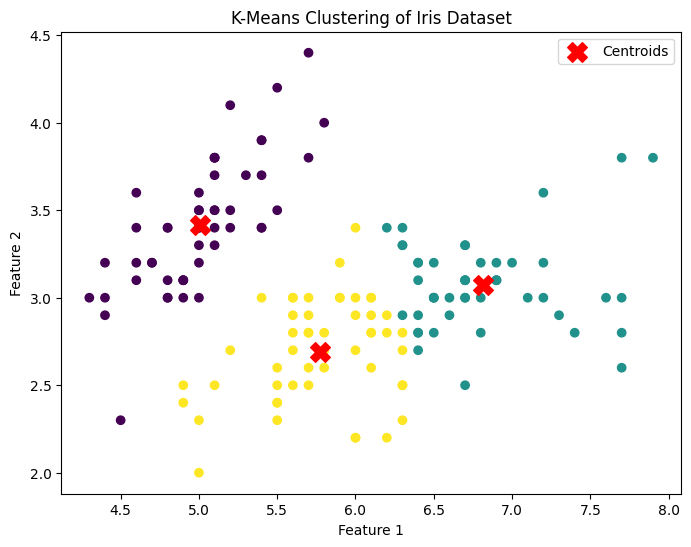

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the Iris dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(url, header=None)

# Select the features you want to use for clustering (e.g., columns 0 and 1)
X = iris.iloc[:, [0, 1]].values

# Specify the number of clusters (k)
k = 3

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k)

# Fit the model to your data
kmeans.fit(X)

# Get cluster labels for each data point
labels = kmeans.labels_

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
